In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to the dataset directory
dataset_dir = 'train'


In [9]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32
# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [14]:
class_names = os.listdir(dataset_dir)
class_names

['NORMAL', 'PNEUMONIA']

In [15]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Tashin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/10


c:\Users\Tashin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.7844 - loss: 0.4409 - val_accuracy: 0.9541 - val_loss: 0.1359
Epoch 2/10
  1/130 ━━━━━━━━━━━━━━━━━━━━ 29s 231ms/step - accuracy: 1.0000 - loss: 0.0534

c:\Users\Tashin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 0.9474 - val_loss: 0.1231
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 123s 914ms/step - accuracy: 0.9633 - loss: 0.0957 - val_accuracy: 0.9541 - val_loss: 0.1327
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0411 - val_accuracy: 0.9474 - val_loss: 0.0241
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 118s 885ms/step - accuracy: 0.9728 - loss: 0.0754 - val_accuracy: 0.9609 - val_loss: 0.1083
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.8947 - val_loss: 0.0829
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 116s 865ms/step - accuracy: 0.9796 - loss: 0.0570 - val_accuracy: 0.9609 - val_loss: 0.1226
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0271 - val_accuracy: 0.9474 - val_loss: 0.0238
Epoch 9/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 113s 847ms/step - accuracy: 0.9793 - loss: 0.0539 - val_accurac

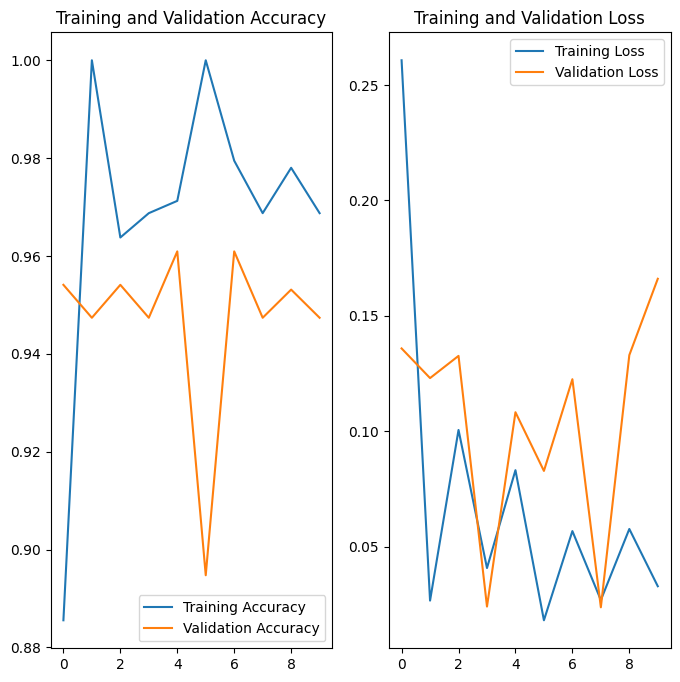

In [21]:
from matplotlib import pyplot as plt
history
history.history.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
model.save("F:\\blog\\pneumonia\\models\\models_1.h5")

In [53]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('F:\\blog\\pneumonia\\models\\models_1.h5')

# Load and preprocess the image
image_path = 'F:\\blog\\pneumonia\\training\\train\\NORMAL\\IM-0117-0001.jpeg'
image = Image.open(image_path)
image = image.resize((img_width, img_height))  # Resize the image to match the input dimensions
image_array = np.array(image) / 255.0  # Normalize the pixel values

# Expand dimensions to match the batch size
image_array = np.expand_dims(image_array, axis=0)

# Obtain predictions
predictions = loaded_model.predict(image_array)

# Interpret the prediction
predicted_class = np.argmax(predictions[0])
class_label = 'PNEUMONIA' if predicted_class == 1 else 'NORMAL'
confidence = predictions[0][predicted_class]

print("Predicted class:", class_label)
print("Confidence:", confidence)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 150, 150), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (1, 150, 150)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150), dtype=float32)
  • training=False
  • mask=None

In [54]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


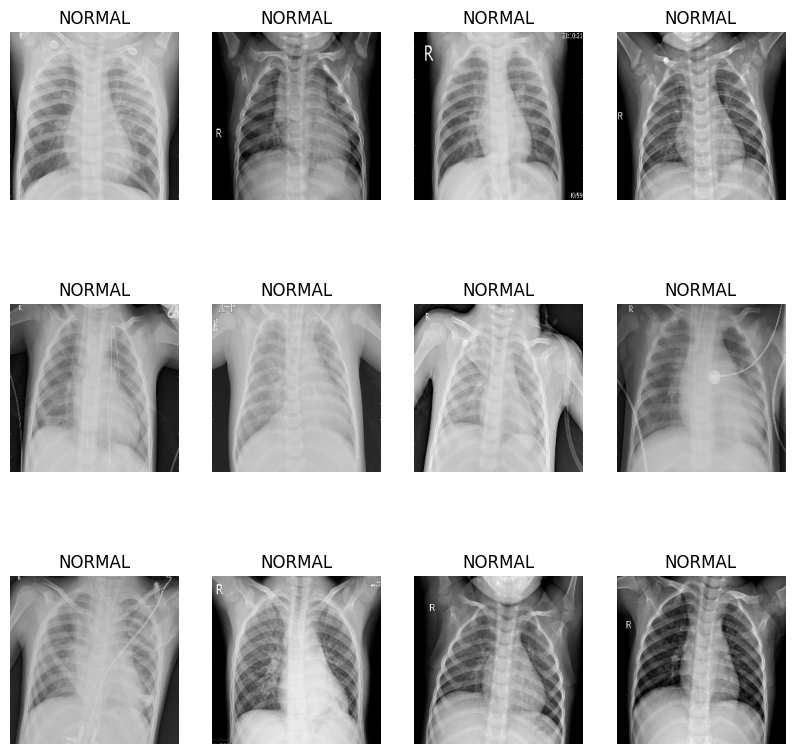

In [2]:
class_names = dataset.class_names
class_names
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        image = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[1]])
        plt.axis("off")

In [4]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

print(len(train_ds), len(val_ds), len(test_ds))

train_ds  =train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds  =val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds  =test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)


130 16 17


In [5]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256 , 256),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [6]:
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(32, 256, 256 , 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model

c:\Users\Tashin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


<Sequential name=sequential_2, built=False>

In [7]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

history = model.fit(
    train_ds,
    epochs= 50,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.7548 - loss: 0.6158 - val_accuracy: 0.8770 - val_loss: 0.3346
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 713ms/step - accuracy: 0.8773 - loss: 0.3032 - val_accuracy: 0.8984 - val_loss: 0.2455
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 92s 709ms/step - accuracy: 0.9000 - loss: 0.2376 - val_accuracy: 0.9219 - val_loss: 0.2439
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 89s 684ms/step - accuracy: 0.9175 - loss: 0.2343 - val_accuracy: 0.9082 - val_loss: 0.2433
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 100s 771ms/step - accuracy: 0.9253 - loss: 0.1930 - val_accuracy: 0.9121 - val_loss: 0.2546
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 97s 744ms/step - accuracy: 0.9110 - loss: 0.2410 - val_accuracy: 0.9336 - val_loss: 0.1841
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 98s 753ms/step - accuracy: 0.9322 - loss: 0.1688 - val_accuracy: 0.9199 - val_loss: 0.2354
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 98s 752ms/step - accuracy: 0.9230 - loss: 0.

In [8]:
scores = model.evaluate(test_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 77s 355ms/step - accuracy: 0.9492 - loss: 0.1123


In [9]:
scores

[0.1104174330830574, 0.9540441036224365]

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Training and validation Loss')

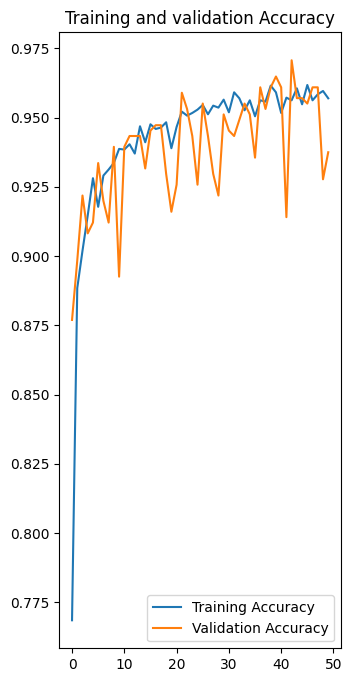

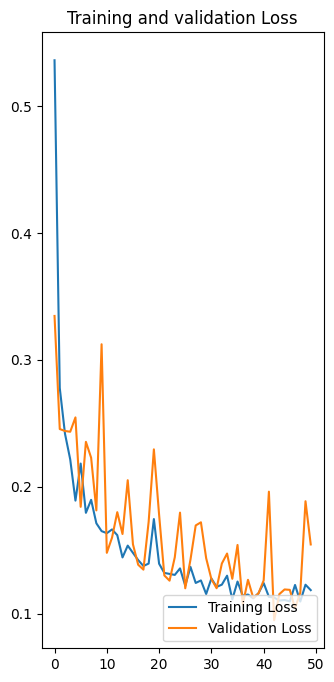

In [11]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1 , 2, 1)
plt.plot(range(50), acc, label = 'Training Accuracy')
plt.plot(range(50), val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1 , 2, 2)
plt.plot(range(50), loss, label = 'Training Loss')
plt.plot(range(50), val_loss, label = 'Validation Loss')
plt.legend(loc= 'lower right')
plt.title('Training and validation Loss')

first image to predict
actual label: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
predicted label: PNEUMONIA


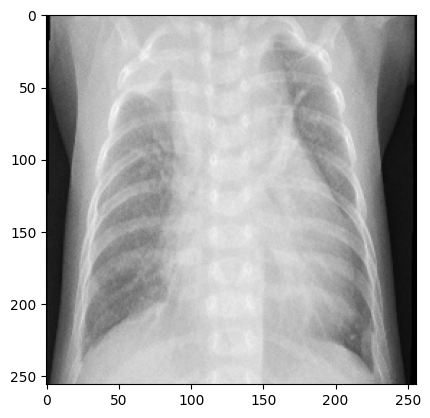

In [12]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [13]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class,confidence

In [16]:
import os
[int(i) for i in os.listdir("../model")]

[]

In [24]:
model_version = 3
model.save(f"F:/blog/pneumonia/model/{model_version}")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=F:/blog/pneumonia/model/3.